# **SATRIA DATA 2025**

**Team Ihre einzige grenze ist ihr verstand**

## **Data Understanding**

### 1. Deskripsi Dataset

Dataset yang digunakan berasal dari **kompetisi Satria Data 2025 (Big Data Challenge)**, dengan fokus pada **analisis emosi manusia**.
Dataset ini berisi kumpulan data video dan label emosi.

* **Sumber data**: panitia kompetisi Satria Data.
* **Format**: CSV.
* **Jumlah record**: 803.
* **Tujuan utama**: membangun model machine learning untuk mengklasifikasikan emosi berdasarkan fitur yang tersedia.

### 2. Struktur Data

Berdasarkan inspeksi awal, dataset memiliki beberapa kolom penting, di antaranya:

* `id` → ID unik untuk setiap data.
* `video` → URL video yang menjadi sumber data.
* `emotion_clean` → Label emosi (target variabel).
* Kolom tambahan (fitur numerik/kategorikal lainnya) yang akan digunakan dalam analisis.

### 3. Kualitas Data

* **Missing values**: terdapat sejumlah nilai kosong di beberapa kolom yang perlu ditangani.
* **Duplikasi**: terdapat kemungkinan duplikasi data pada kolom `video`.
* **Konsistensi**: kolom URL video memiliki format yang tidak seragam, sehingga perlu dilakukan normalisasi.

### 4. Label Emosi

Label target (`emotion_clean`) direpresentasikan dalam bentuk angka 0–7 dengan arti sebagai berikut:

| Label | Emosi    |
| ----- | -------- |
| 0     | Proud    |
| 1     | Trust    |
| 2     | Joy      |
| 3     | Surprise |
| 4     | Neutral  |
| 5     | Sadness  |
| 6     | Fear     |
| 7     | Anger    |

### 5. Korelasi dan Pola Awal

* Fitur numerik tertentu menunjukkan adanya korelasi satu sama lain.
* Video yang sama bisa muncul di dataset train dan test, sehingga perlu diperhatikan agar tidak terjadi **data leakage**.
* Insight awal: distribusi label yang tidak seimbang bisa memengaruhi performa model baseline.

### 6. Kesimpulan Sementara

* Dataset memiliki informasi yang cukup untuk membangun model klasifikasi emosi.
* Terdapat potensi masalah **missing values, duplikasi, dan imbalance data**.
* Tahap berikutnya adalah melakukan **data preparation**: pembersihan, transformasi, dan rekayasa fitur sebelum modeling.

## **Data Preparation**

### A. Analisis Awal

#### 1. Load Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/datatrain.csv")

print("🔹 Dataset shape:", df.shape)
print("🔹 Kolom yang tersedia:", df.columns.tolist())
print(df.head())

🔹 Dataset shape: (803, 3)
🔹 Kolom yang tersedia: ['id', 'video', 'emotion']
   id                                              video   emotion
0   1  https://www.instagram.com/reel/DNKcHgdA-d1/?ig...  Surprise
1   2  https://www.instagram.com/reel/DNHwrh2gnBm/?ig...  Surprise
2   3  https://www.instagram.com/reel/DM7QsjnRCoa/?ig...  Surprise
3   4  https://www.instagram.com/reel/DNBBEt6Paxj/?ig...  Surprise
4   5  https://www.instagram.com/reel/DMz13fQzZsN/?ig...     Proud


#### 2. Cek Missing Values

In [7]:
print("\n🔹 Missing Values per Kolom:")
print(df.isna().sum())


🔹 Missing Values per Kolom:
id         0
video      0
emotion    0
dtype: int64


#### 3. Cek Duplikasi

In [8]:
total_duplicates = df.duplicated().sum()
video_duplicates = df['video'].duplicated().sum() if 'video' in df.columns else 0

print(f"\n🔹 Total Baris Duplikat: {total_duplicates}")
print(f"🔹 Duplikat pada Kolom video: {video_duplicates}")
print(f"🔹 Jumlah URL unik: {df['video'].nunique()}")


🔹 Total Baris Duplikat: 0
🔹 Duplikat pada Kolom video: 27
🔹 Jumlah URL unik: 776


#### 4. Mapping Canonical Labels

In [9]:
CANONICAL = {
    'surprise': 'Surprise',
    'terkejut': 'Surprise',
    'trkejut': 'Surprise',
    'kaget': 'Surprise',
    'trekejut': 'Surprise',
    'terkjut': 'Surprise',

    'joy': 'Joy',
    'happy': 'Joy',

    'trust': 'Trust',
    'faith': 'Trust',
    'loyalty': 'Trust',
    'percaya': 'Trust',
    'percaya ': 'Trust',

    'proud': 'Proud',
    'pride': 'Proud',
    'bangga': 'Proud',
    'love': 'Proud',

    'sadness': 'Sadness',
    'sad': 'Sadness',

    'anger': 'Anger',
    'angry': 'Anger',
    'marah': 'Anger',
    'marh': 'Anger',

    'fear': 'Fear',

    'neutral': 'Neutral'
}

# Normalisasi label
df['emotion_clean'] = df['emotion'].str.lower().str.strip().map(CANONICAL)
df['emotion_clean'].fillna(df['emotion'], inplace=True)

#### 5. Distribusi Label

In [10]:
label_distribution = (
    df['emotion_clean']
    .value_counts()
    .to_frame()
    .reset_index()
)
label_distribution.columns = ['Emotion', 'Count']
label_distribution['Percentage'] = (label_distribution['Count'] / len(df) * 100).round(2)

print("\n🔹 Distribusi Label Emosi:")
print(label_distribution)


🔹 Distribusi Label Emosi:
    Emotion  Count  Percentage
0  Surprise    331       41.22
1     Trust    184       22.91
2     Proud    157       19.55
3       Joy     53        6.60
4     Anger     36        4.48
5   Sadness     18        2.24
6      Fear     16        1.99
7   Neutral      8        1.00


#### 6. Visualisasi Distribusi

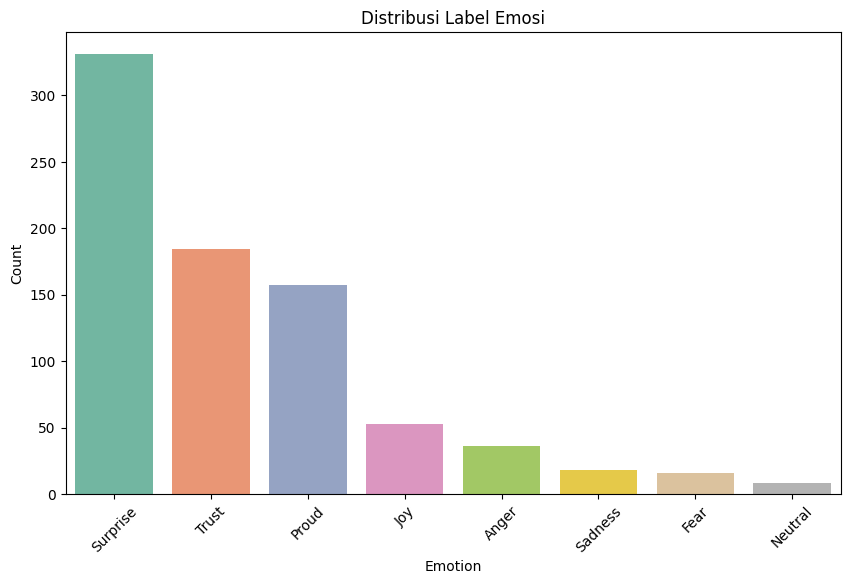

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(data=label_distribution, x="Emotion", y="Count", palette="Set2")
plt.title("Distribusi Label Emosi")
plt.xticks(rotation=45)
plt.show()

#### 7. Insight Awal

In [7]:
print("\n🔹 Insight Awal:")
print("- Dataset memiliki", len(df), "baris data")
print("- Jumlah missing values relatif kecil/besar tergantung hasil di atas")
print("- Ada", total_duplicates, "baris duplikat")
print("- Ada", video_duplicates, "URL video duplikat")
print("- Label paling dominan:", label_distribution.iloc[0,0], 
      "dengan", label_distribution.iloc[0,1], "sampel (", label_distribution.iloc[0,2], "% )")
print("- Terdapat indikasi class imbalance, terutama pada kelas minoritas (Neutral, Fear, Sadness)")


🔹 Insight Awal:
- Dataset memiliki 803 baris data
- Jumlah missing values relatif kecil/besar tergantung hasil di atas
- Ada 0 baris duplikat
- Ada 27 URL video duplikat
- Label paling dominan: Surprise dengan 331 sampel ( 41.22 % )
- Terdapat indikasi class imbalance, terutama pada kelas minoritas (Neutral, Fear, Sadness)


### B. Analisis Lanjutan

#### 1. Class Imbalance


🔹 Distribusi Label Emosi
    Emotion  Count  Percentage
0  Surprise    331       41.22
1     Trust    184       22.91
2     Proud    157       19.55
3       Joy     53        6.60
4     Anger     36        4.48
5   Sadness     18        2.24
6      Fear     16        1.99
7   Neutral      8        1.00


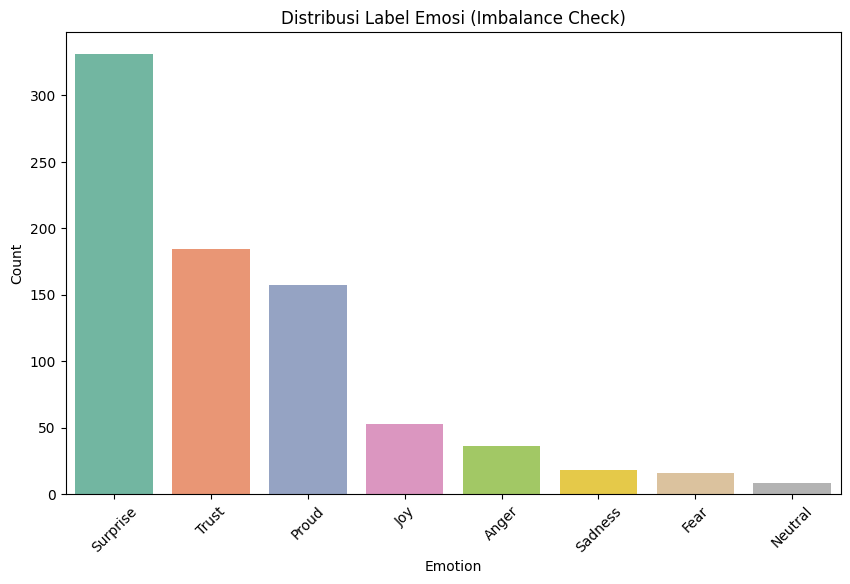

In [8]:
label_dist = df['emotion_clean'].value_counts().to_frame().reset_index()
label_dist.columns = ['Emotion', 'Count']
label_dist['Percentage'] = (label_dist['Count'] / len(df) * 100).round(2)

print("\n🔹 Distribusi Label Emosi")
print(label_dist)

plt.figure(figsize=(10,6))
sns.barplot(data=label_dist, x="Emotion", y="Count", palette="Set2")
plt.title("Distribusi Label Emosi (Imbalance Check)")
plt.xticks(rotation=45)
plt.show()

#### 2. Duplikasi URL Video

In [9]:
dupes = df[df['video'].duplicated(keep=False)].sort_values("video")
print("\n🔹 Contoh Duplikat URL Video:")
print(dupes.head(10))

print(f"\nTotal URL duplikat: {df['video'].duplicated().sum()}")
print(f"Jumlah URL unik: {df['video'].nunique()}")


🔹 Contoh Duplikat URL Video:
    id                                              video   emotion  \
74  75  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Proud   
75  76  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Trust   
88  89  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Trust   
89  90  https://drive.google.com/file/d/12YBpn9zWc_3Ff...      Fear   
90  91  https://drive.google.com/file/d/12YBpn9zWc_3Ff...   Neutral   
91  92  https://drive.google.com/file/d/12YBpn9zWc_3Ff...  Surprise   
92  93  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Proud   
93  94  https://drive.google.com/file/d/12YBpn9zWc_3Ff...  Surprise   
94  95  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Trust   
95  96  https://drive.google.com/file/d/12YBpn9zWc_3Ff...     Proud   

   emotion_clean  
74         Proud  
75         Trust  
88         Trust  
89          Fear  
90       Neutral  
91      Surprise  
92         Proud  
93      Surprise  
94         Trust 

#### 3. Mayoritas vs Minoritas


🔹 Persentase Mayoritas vs Minoritas
group
Mayoritas    83.686177
Minoritas    16.313823
Name: proportion, dtype: float64


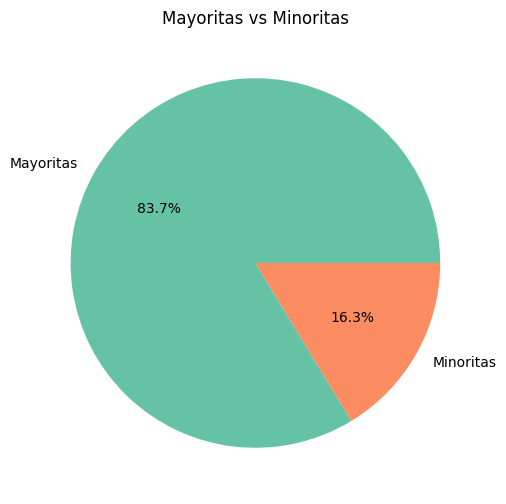

In [10]:
major = ["Surprise", "Trust", "Proud"]
df['group'] = df['emotion_clean'].apply(lambda x: "Mayoritas" if x in major else "Minoritas")

group_dist = df['group'].value_counts(normalize=True) * 100
print("\n🔹 Persentase Mayoritas vs Minoritas")
print(group_dist)

plt.figure(figsize=(6,6))
df['group'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#66c2a5","#fc8d62"])
plt.title("Mayoritas vs Minoritas")
plt.ylabel("")
plt.show()

#### 4. Cek Akses URL

In [11]:
import pandas as pd
import requests
import random
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# List User-Agent agar mirip browser sungguhan
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
    "(KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
    "AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
    "(KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
]

session = requests.Session()

def check_url(url):
    headers = {"User-Agent": random.choice(USER_AGENTS)}
    try:
        response = session.get(url, headers=headers, allow_redirects=True, timeout=10)

        if response.status_code == 200:
            return "Accessible"
        elif response.status_code in [301, 302]:
            return "Redirect"
        elif response.status_code == 403:
            return "Forbidden (Need Login/Permission)"
        elif response.status_code == 429:
            return "Rate Limited"
        elif response.status_code == 404:
            return "Not Found (Expired)"
        else:
            return f"Error {response.status_code}"

    except requests.RequestException:
        return "Request Failed"

# ==== Versi Parallel dengan ThreadPoolExecutor ====
def process_urls(df, max_workers=20):
    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_url = {executor.submit(check_url, url): url for url in df['video']}
        for future in tqdm(as_completed(future_to_url), total=len(future_to_url), desc="Checking URLs"):
            url = future_to_url[future]
            try:
                results[url] = future.result()
            except Exception:
                results[url] = "Request Failed"
    df['status_check'] = df['video'].map(results)
    return df

# Jalankan
df = process_urls(df, max_workers=20)

print("\n🔹 Ringkasan Hasil:")
print(df['status_check'].value_counts())

Checking URLs: 100%|██████████| 803/803 [01:00<00:00, 13.32it/s]


🔹 Ringkasan Hasil:
status_check
Accessible                           781
Forbidden (Need Login/Permission)     21
Error 401                              1
Name: count, dtype: int64


## **Data Preprocessing**

### Menghapus URL Error

In [12]:
# Buat daftar status yang mau dihapus
remove_status = [
    "Request Failed",
    "Forbidden (Need Login/Permission)"
]

# Hapus juga semua status yang mengandung kata "Error"
mask_error = df['status_check'].str.contains("Error", na=False)

# Gabungkan kondisi
df_clean = df[~df['status_check'].isin(remove_status) & ~mask_error].copy()

print("\n🔹 Ringkasan setelah dibersihkan:")
print(df_clean['status_check'].value_counts())

# Kalau mau overwrite df lama:
df = df_clean


🔹 Ringkasan setelah dibersihkan:
status_check
Accessible    781
Name: count, dtype: int64


### Menghapus Duplikasi

In [13]:
df = df.drop_duplicates(subset=["video"])

### Mendownload Data Video

In [14]:
import os
import re
import gdown
import subprocess
import pandas as pd
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Pastikan folder video ada
os.makedirs("data/train/video", exist_ok=True)

def clean_incomplete():
    """Hapus file .part (download gagal/tidak selesai)."""
    removed = []
    for f in os.listdir("data/train/video"):
        if f.endswith(".part"):
            os.remove(os.path.join("data/train/video", f))
            removed.append(f)
    return removed

def download_drive(file_id, output_path):
    try:
        gdown.download(id=file_id, output=output_path, quiet=True)
        return True
    except Exception as e:
        return f"Gagal Google Drive {file_id}: {e}"

def download_instagram(url, output_path):
    try:
        cmd = ["yt-dlp", "-o", output_path, url]
        subprocess.run(cmd, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        return True
    except Exception as e:
        return f"Gagal Instagram {url}: {e}"

def download_one(row):
    url = row["video"]
    file_id = str(row["id"])
    output_path = os.path.join("data/train/video", f"{file_id}.mp4")

    # Skip kalau sudah ada
    if os.path.exists(output_path):
        return f"Skip {file_id}"

    if "drive.google.com" in url:
        match = re.search(r"/d/([^/]+)", url)
        gdrive_id = match.group(1) if match else None
        if gdrive_id:
            return download_drive(gdrive_id, output_path)
    elif "instagram" in url:
        return download_instagram(url, output_path)
    else:
        return f"URL tidak dikenali: {url}"

def download_videos(df, max_workers=10):
    # Step 1: hapus .part
    removed = clean_incomplete()
    if removed:
        print(f"🗑️ Menghapus file .part: {len(removed)}")

    # Step 2: skip id yang sudah ada
    downloaded_ids = {
        f.split(".")[0] for f in os.listdir("data/train/video") if f.endswith(".mp4")
    }
    df_todo = df[~df["id"].astype(str).isin(downloaded_ids)].copy()

    print(f"📌 Total video di data : {len(df)}")
    print(f"✅ Sudah ada           : {len(downloaded_ids)}")
    print(f"⬇️ Akan didownload     : {len(df_todo)}")

    results = []
    if not df_todo.empty:
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = [executor.submit(download_one, row) for _, row in df_todo.iterrows()]
            for f in tqdm(as_completed(futures), total=len(futures), desc="Downloading videos"):
                results.append(f.result())
    return results

hasil = download_videos(df, max_workers=8)

📌 Total video di data : 755
✅ Sudah ada           : 753
⬇️ Akan didownload     : 2


In [15]:
# Cek jumlah file akhir
final_count = len([f for f in os.listdir("data/train/video") if f.endswith(".mp4")])
print(f"\n🎯 Jumlah file video final: {final_count} dari {len(df)} data")


🎯 Jumlah file video final: 753 dari 755 data


In [16]:
# Ambil semua id yang berhasil di-download (file .mp4 ada di folder)
downloaded_ids = {
    f.split(".")[0] for f in os.listdir("data/train/video") if f.endswith(".mp4")
}

# Cari data yang tidak ada filenya
df_missing = df[~df["id"].astype(str).isin(downloaded_ids)].copy()

print(f"❌ Jumlah video gagal: {len(df_missing)}")
print("\n🔎 Contoh data yang gagal:")
print(df_missing.head())

# Opsional: cek distribusi sumber (Instagram / Drive)
df_missing["source"] = df_missing["video"].apply(
    lambda x: "Google Drive" if "drive.google.com" in x else
              "Instagram" if "instagram.com/reel" in x else "Other"
)
print("\n📊 Distribusi sumber video yang gagal:")
print(df_missing["source"].value_counts())


❌ Jumlah video gagal: 2

🔎 Contoh data yang gagal:
      id                                              video   emotion  \
459  460  https://www.instagram.com/reel/DLUesJ4RTin/?ut...     Trust   
795  796  https://www.instagram.com/reel/DMVRWpmTqUC/?ig...  Surprise   

    emotion_clean      group status_check  
459         Trust  Mayoritas   Accessible  
795      Surprise  Mayoritas   Accessible  

📊 Distribusi sumber video yang gagal:
source
Instagram    2
Name: count, dtype: int64


In [17]:
video_dir = "data/train/video"

# ambil semua id video yang sudah sukses didownload (ekstensi .mp4)
downloaded_ids = {os.path.splitext(f)[0] for f in os.listdir(video_dir) if f.endswith(".mp4")}

# filter hanya baris yang id-nya ada di downloaded_ids
df_downloaded = df[df['id'].astype(str).isin(downloaded_ids)].copy()

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data setelah filter (hanya yang terunduh): {len(df_downloaded)}")
print(f"Jumlah data gagal (dihapus): {len(df) - len(df_downloaded)}")

Jumlah data awal: 755
Jumlah data setelah filter (hanya yang terunduh): 753
Jumlah data gagal (dihapus): 2


### Menyimpan ke Drive

In [ ]:
import os
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive

# --- autentikasi ---
gauth = GoogleAuth()
gauth.LocalWebserverAuth()  # akan buka browser untuk login Google
drive = GoogleDrive(gauth)

# --- tentukan folder di Google Drive ---
folder_id = "1doDmLnv1T6yBHvC78nZrYQ4KYfCWj0BM"

# --- upload semua video ---
video_dir = "data/video"

for fname in os.listdir(video_dir):
    if fname.endswith(".mp4"):
        file_path = os.path.join(video_dir, fname)
        gfile = drive.CreateFile({
            'title': fname,
            'parents': [{'id': folder_id}] if folder_id else []
        })
        gfile.SetContentFile(file_path)
        gfile.Upload()
        print(f"✅ Uploaded {fname}")

### Melakukan Ekstrak Audio

In [19]:
import os
import subprocess
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

video_dir = "data/train/video"
audio_dir = "data/train/audio"
os.makedirs(audio_dir, exist_ok=True)

def convert_to_audio(video_file):
    video_path = os.path.join(video_dir, video_file)
    audio_path = os.path.join(audio_dir, os.path.splitext(video_file)[0] + ".mp3")

    # Skip kalau audio sudah ada
    if os.path.exists(audio_path):
        return (video_file, "⏭️ skipped (sudah ada)")

    try:
        # ffmpeg extract audio (cepat & efisien)
        cmd = [
            "ffmpeg", "-y", "-i", video_path,
            "-vn", "-acodec", "mp3", audio_path
        ]
        subprocess.run(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=True)
        return (video_file, "✅ success")
    except Exception as e:
        return (video_file, f"❌ gagal: {e}")

# Ambil semua file video
video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]

results = []
with ThreadPoolExecutor(max_workers=8) as executor:  # sesuaikan jumlah core
    futures = {executor.submit(convert_to_audio, f): f for f in video_files}
    for future in tqdm(as_completed(futures), total=len(futures), desc="Converting"):
        results.append(future.result())

# Ringkasan hasil
for fname, status in results:
    print(f"{fname}: {status}")

print("🎯 Proses konversi selesai.")


Converting: 100%|██████████| 753/753 [00:00<00:00, 14885.97it/s]

142.mp4: ⏭️ skipped (sudah ada)
107.mp4: ⏭️ skipped (sudah ada)
127.mp4: ⏭️ skipped (sudah ada)
12.mp4: ⏭️ skipped (sudah ada)
112.mp4: ⏭️ skipped (sudah ada)
134.mp4: ⏭️ skipped (sudah ada)
108.mp4: ⏭️ skipped (sudah ada)
106.mp4: ⏭️ skipped (sudah ada)
141.mp4: ⏭️ skipped (sudah ada)
103.mp4: ⏭️ skipped (sudah ada)
126.mp4: ⏭️ skipped (sudah ada)
149.mp4: ⏭️ skipped (sudah ada)
133.mp4: ⏭️ skipped (sudah ada)
140.mp4: ⏭️ skipped (sudah ada)
125.mp4: ⏭️ skipped (sudah ada)
132.mp4: ⏭️ skipped (sudah ada)
14.mp4: ⏭️ skipped (sudah ada)
119.mp4: ⏭️ skipped (sudah ada)
124.mp4: ⏭️ skipped (sudah ada)
147.mp4: ⏭️ skipped (sudah ada)
131.mp4: ⏭️ skipped (sudah ada)
114.mp4: ⏭️ skipped (sudah ada)
122.mp4: ⏭️ skipped (sudah ada)
154.mp4: ⏭️ skipped (sudah ada)
111.mp4: ⏭️ skipped (sudah ada)
139.mp4: ⏭️ skipped (sudah ada)
146.mp4: ⏭️ skipped (sudah ada)
117.mp4: ⏭️ skipped (sudah ada)
11.mp4: ⏭️ skipped (sudah ada)
130.mp4: ⏭️ skipped (sudah ada)
153.mp4: ⏭️ skipped (sudah ada)
138.mp4: ⏭️

In [20]:
# Ambil semua id video (tanpa ekstensi)
video_ids = {os.path.splitext(f)[0] for f in os.listdir(video_dir) if f.endswith(".mp4")}
audio_ids = {os.path.splitext(f)[0] for f in os.listdir(audio_dir) if f.endswith(".mp3")}

missing = video_ids - audio_ids
extra = audio_ids - video_ids

print("📊 Ringkasan Konversi:")
print(f"🎥 Jumlah video : {len(video_ids)}")
print(f"🎵 Jumlah audio : {len(audio_ids)}")

if not missing:
    print("✅ Semua video sudah dikonversi ke audio")
else:
    print(f"⚠️ Belum semua terkonversi, {len(missing)} video belum ada audio-nya.")
    print("Contoh ID yang belum terkonversi:", list(missing)[:10])

if extra:
    print(f"ℹ️ Ada {len(extra)} audio tanpa video terkait (mungkin file sisa lama).")


📊 Ringkasan Konversi:
🎥 Jumlah video : 753
🎵 Jumlah audio : 753
✅ Semua video sudah dikonversi ke audio


### Melakukan Ekstrak Teks

In [21]:
import os
import whisper
from tqdm import tqdm

audio_dir = "data/train/audio"
text_dir = "data/train/text"
os.makedirs(text_dir, exist_ok=True)

# Pilih model yang ringan
model = whisper.load_model("small", device="cpu")

# Ambil semua file audio
files = [f for f in os.listdir(audio_dir) if f.endswith(".mp3")]

ok, skip, fail = [], [], []

for fname in tqdm(files, desc="Transcribing"):
    audio_path = os.path.join(audio_dir, fname)
    txt_path = os.path.join(text_dir, os.path.splitext(fname)[0] + ".txt")

    # Skip kalau sudah ada hasil
    if os.path.exists(txt_path):
        skip.append(fname)
        continue

    try:
        result = model.transcribe(audio_path, language="id", fp16=False)
        with open(txt_path, "w", encoding="utf-8") as f:
            f.write(result["text"].strip())
        ok.append(fname)
    except Exception as e:
        fail.append((fname, str(e)))

# Ringkasan
print("\n📊 Ringkasan:")
print(f"✅ Berhasil transkrip : {len(ok)}")
print(f"⏭️ Sudah ada (skip)   : {len(skip)}")
print(f"❌ Gagal transkrip    : {len(fail)}")

if fail:
    print("\n🔎 Contoh error:")
    for f, e in fail[:5]:
        print(f"- {f}: {e}")

Transcribing: 100%|██████████| 753/753 [00:00<00:00, 9196.67it/s]


📊 Ringkasan:
✅ Berhasil transkrip : 0
⏭️ Sudah ada (skip)   : 753
❌ Gagal transkrip    : 0


### Membuat Pipeline Datatest

In [22]:
import os
import subprocess
import pandas as pd
from tqdm import tqdm
import whisper

# === Path setup ===
csv_path = "data/datatest.csv"
base_dir = "data/test"
video_dir = os.path.join(base_dir, "video")
audio_dir = os.path.join(base_dir, "audio")
text_dir = os.path.join(base_dir, "text")

for d in [video_dir, audio_dir, text_dir]:
    os.makedirs(d, exist_ok=True)

# === Load dataset ===
test_df = pd.read_csv(csv_path)

# === Load Whisper model ===
# Pilih sesuai kebutuhan: tiny/base/small/medium/large
model = whisper.load_model("small", device="cpu")

# === 1. Download video ===
for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Downloading videos"):
    vid_id, url = str(row["id"]), row["video"]
    video_path = os.path.join(video_dir, f"{vid_id}.mp4")

    # skip jika file video sudah ada
    if os.path.exists(video_path):
        continue

    try:
        subprocess.run(
            ["yt-dlp", "-o", video_path, url],
            check=True,
            capture_output=True
        )
    except subprocess.CalledProcessError as e:
        print(f"❌ Gagal download {url}: {e.stderr.decode(errors='ignore')}")

# === 2. Extract audio ===
for fname in tqdm(os.listdir(video_dir), desc="Extracting audio"):
    if not fname.endswith(".mp4"):
        continue
    vid_id = os.path.splitext(fname)[0]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, f"{vid_id}.mp3")

    # skip jika file audio sudah ada
    if os.path.exists(audio_path):
        continue

    try:
        subprocess.run(
            ["ffmpeg", "-y", "-i", video_path, "-vn", "-acodec", "mp3", audio_path],
            check=True,
            capture_output=True
        )
    except subprocess.CalledProcessError as e:
        print(f"❌ Gagal ekstrak audio {fname}: {e.stderr.decode(errors='ignore')}")

# === 3. Transcribe audio ===
for fname in tqdm(os.listdir(audio_dir), desc="Transcribing audio"):
    if not fname.endswith(".mp3"):
        continue
    vid_id = os.path.splitext(fname)[0]
    audio_path = os.path.join(audio_dir, fname)
    text_path = os.path.join(text_dir, f"{vid_id}.txt")

    # skip jika file teks sudah ada
    if os.path.exists(text_path):
        continue

    try:
        result = model.transcribe(audio_path, language="id")
        with open(text_path, "w", encoding="utf-8") as f:
            f.write(result["text"].strip())
    except Exception as e:
        print(f"❌ Gagal transkrip {fname}: {e}")

print("🎯 Pipeline selesai: video, audio, dan teks disimpan di data/test/")

Transcribing audio: 100%|██████████| 200/200 [00:00<00:00, 11766.71it/s]

🎯 Pipeline selesai: video, audio, dan teks disimpan di data/test/


### Membuat Dataset

In [23]:
# Fungsi normalisasi label
def normalize_label(label):
    if pd.isna(label):
        return None
    label = str(label).strip().lower()
    return CANONICAL.get(label, label)  # jika tidak ada di mapping, biarkan

# Fungsi membaca teks hasil ekstraksi
def read_text_file(path):
    if os.path.exists(path):
        with open(path, "r", encoding="utf-8") as f:
            return f.read().strip()
    return None

# Load dataset awal
train_df = df_downloaded.copy()
test_df = pd.read_csv("data/datatest.csv")

# --- Proses train ---
train_texts = []
for idx, row in train_df.iterrows():
    text_path = f"data/train/text/{row['id']}.txt"
    train_texts.append(read_text_file(text_path))

train_df["text"] = train_texts
train_df["label"] = train_df["emotion"].apply(normalize_label)

final_train = train_df[["id", "text", "label"]]
final_train.to_csv("data/final_datatrain.csv", index=False, encoding="utf-8")

# --- Proses test ---
test_texts = []
for idx, row in test_df.iterrows():
    text_path = f"data/test/text/{row['id']}.txt"
    test_texts.append(read_text_file(text_path))

test_df["text"] = test_texts
final_test = test_df[["id", "text"]]
final_test.to_csv("data/final_datatest.csv", index=False, encoding="utf-8")

# --- Cek hasil ---
print("✅ Dataset final berhasil dibuat:")
print(f"- data/final_datatrain.csv ({len(final_train)} rows)")
print(f"- data/final_datatest.csv ({len(final_test)} rows)")

print("\n📊 Distribusi label (train):")
print(final_train["label"].value_counts(dropna=False))


✅ Dataset final berhasil dibuat:
- data/final_datatrain.csv (753 rows)
- data/final_datatest.csv (200 rows)

📊 Distribusi label (train):
label
Surprise    315
Trust       164
Proud       150
Joy          51
Anger        36
Sadness      16
Fear         15
Neutral       6
Name: count, dtype: int64
